<h1><font size=12>
Weather Derivates </h1>
<h1> Precipitation Bogota Exploration - El Dorado Airport<br></h1>

Developed by [Jesus Solano](mailto:ja.solano588@uniandes.edu.co) <br>  
28 Nov 2018 


In [2]:
# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data And Study area Section

In [45]:
# Configure path to read txts.

path = '../datasets/ideamBogota/'

from io import StringIO

# """Determine whether a year is a leap year."""
def isleapyear(year):
    if year % 4 == 0 and (year % 100 != 0 or year % 400 == 0):
        return True
    return False

# Read only one year.

def loadYear(year):
    year=str(year)
    
    filedata =  open(path+ year +'.txt', 'r') 
    
    # Create a dataframe from the year's txt.
    
    columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    precipitationYear =pd.read_csv(StringIO('\n'.join(' '.join(l.split()) for l in filedata)),sep=' ',header=None, names=columnNames,skiprows=lambda x: x in list(range(0,3)) , skipfooter=4  )
    
    # Sort data to solve problem of 28 days of Feb.
    
    for i in range(28,30):
        for j in reversed(range(1,12)):
            precipitationYear.iloc[i,j]= precipitationYear.iloc[i,j-1]
        
        
        # Fix leap years. 
        
        if isleapyear(int(year)) and i == 28:
            count = 1
        else:
            precipitationYear.iloc[i,1]= np.nan 
            
    
    # Fix problem related to months with 31 days.
    
    precipitationYear.iloc[30,11] = precipitationYear.iloc[30,6]
    precipitationYear.iloc[30,9]  = precipitationYear.iloc[30,5]
    precipitationYear.iloc[30,7] = precipitationYear.iloc[30,4]
    precipitationYear.iloc[30,6] = precipitationYear.iloc[30,3]
    precipitationYear.iloc[30,4] = precipitationYear.iloc[30,2]
    precipitationYear.iloc[30,2] = precipitationYear.iloc[30,1]
    
    for i in [1,3,5,8,10]:
        precipitationYear.iloc[30,i] = np.nan
    
    return precipitationYear

# Convert one year data frame to timeseries.

def convertOneYearToSeries(dataFrameYear,nYear):
    dataFrameYearT = dataFrameYear.T
    dates = pd.date_range(str(nYear)+'-01-01', end = str(nYear)+'-12-31' , freq='D')
    
    dataFrameYearAllTime = dataFrameYearT.stack()
    
    dataFrameYearAllTime.index = dates
    
    return dataFrameYearAllTime

# Concatenate all time series between a years range.

def concatYearsPrecipitation(startYear,endYear):
    
    precipitationAllTime = loadYear(startYear)
    precipitationAllTime = convertOneYearToSeries(precipitationAllTime,startYear)
    
    for i in range(startYear,endYear+1):
        tempPrecipitation=loadYear(i)
        tempPrecipitation= convertOneYearToSeries(tempPrecipitation,i)
        
        precipitationAllTime = pd.concat([precipitationAllTime,tempPrecipitation]) 
    
    return precipitationAllTime



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


Text(0,0.5,'Precipitation Amount (mm)')

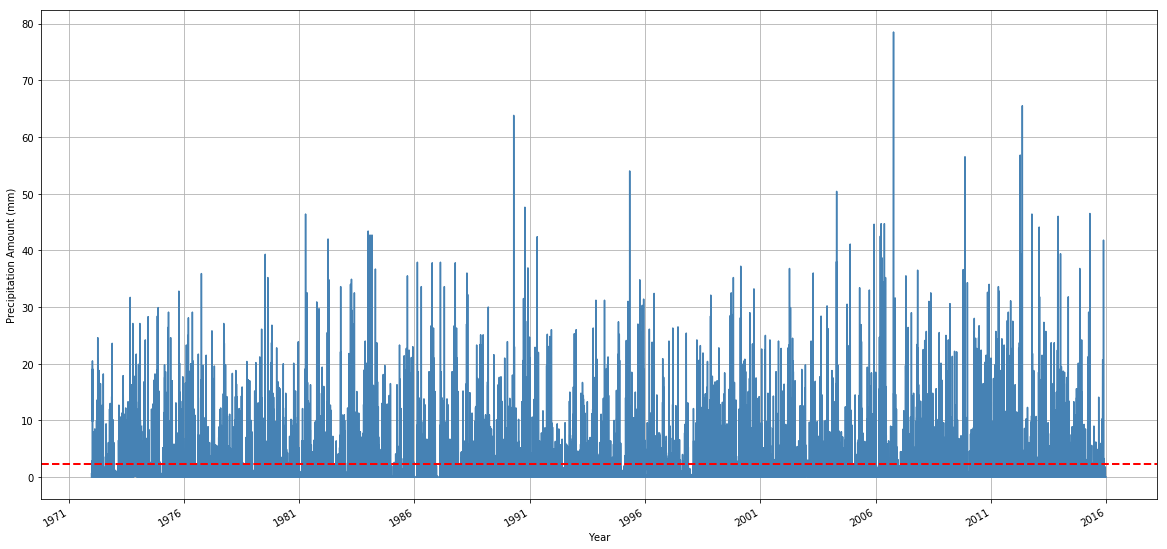

In [60]:
# Plot precipitation over a set of years.

startYear = 1972
endYear = 2015

precipitationAllTime = concatYearsPrecipitation(startYear,endYear)
meanAllTime = precipitationAllTime.mean()
ax = precipitationAllTime.plot(figsize=(20,10),grid=True,color='steelblue')
ax.axhline(y=meanAllTime, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation Amount (mm)')


In [26]:

columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
vv = pd.DataFrame(columns=columnNames)

for year in range(1972,2015+1):
    vv.loc[year] = [sum(loadYear(year)[x]) for x in loadYear(year).columns ]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [28]:
vv.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1972,72.1,25.3,52.1,161.4,122.2,58.1,37.5,39.6,17.4,66.8,105.3,29.1
1973,2.9,3.8,50.1,39.3,75.0,59.5,55.1,57.4,130.3,115.4,105.8,117.3
1974,79.6,100.0,28.5,83.8,61.3,65.5,15.8,46.8,91.8,100.3,150.6,24.0
1975,5.5,32.2,130.0,57.9,105.3,56.4,60.3,52.2,55.1,160.8,70.7,77.9
1976,31.2,59.9,117.5,112.3,114.7,57.2,19.4,34.7,47.3,140.0,81.6,49.5


Text(0.5,0,'Month')

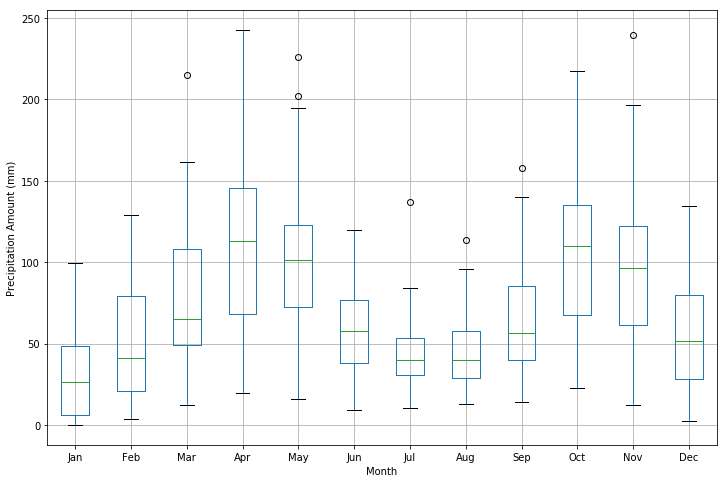

In [39]:
plt.figure(figsize=(12,8))
vv.boxplot()
plt.ylabel('Precipitation Amount (mm)')
plt.xlabel('Month')

In [49]:
vv

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1972,72.1,25.3,52.1,161.4,122.2,58.1,37.5,39.6,17.4,66.8,105.3,29.1
1973,2.9,3.8,50.1,39.3,75.0,59.5,55.1,57.4,130.3,115.4,105.8,117.3
1974,79.6,100.0,28.5,83.8,61.3,65.5,15.8,46.8,91.8,100.3,150.6,24.0
1975,5.5,32.2,130.0,57.9,105.3,56.4,60.3,52.2,55.1,160.8,70.7,77.9
1976,31.2,59.9,117.5,112.3,114.7,57.2,19.4,34.7,47.3,140.0,81.6,49.5
1977,9.1,20.4,72.2,86.4,34.1,15.9,52.0,52.9,115.7,120.4,82.3,26.9
1978,5.6,25.0,55.7,121.4,73.5,71.2,52.9,12.9,66.4,102.9,47.4,30.2
1979,27.5,44.8,55.0,137.3,84.5,77.5,64.8,113.5,86.3,133.4,141.7,25.4
1980,28.2,62.8,30.9,46.2,39.5,76.8,10.7,39.8,48.3,63.6,50.7,102.2
1981,2.5,27.3,13.7,174.6,202.1,78.1,23.7,34.4,51.1,113.4,111.8,25.5


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


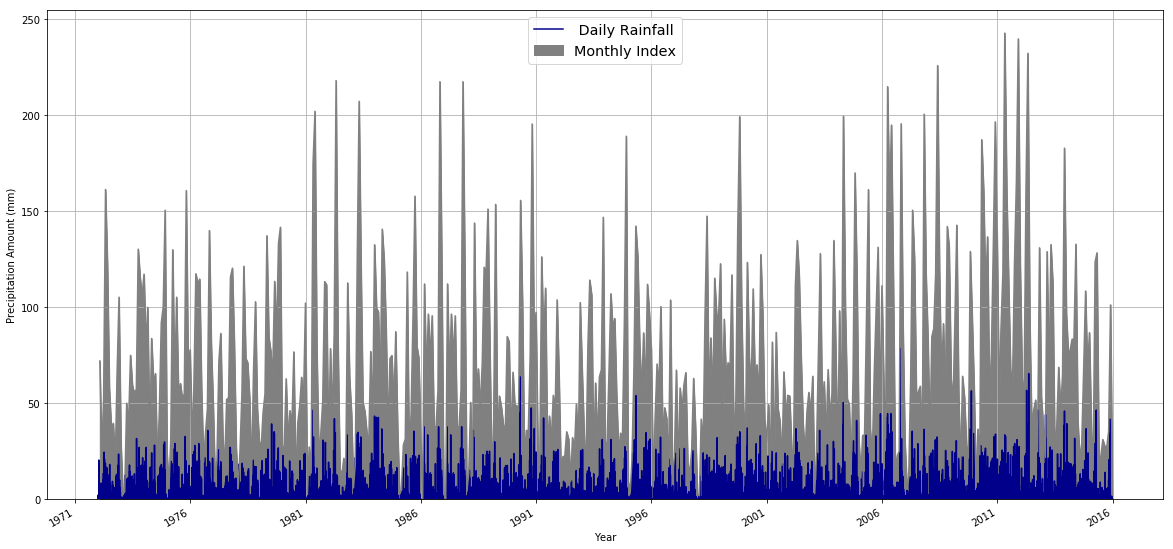

In [72]:
# Plot precipitation over a set of years.

startYear = 1972
endYear = 2015

vdates = pd.date_range(str(startYear)+'-01-01', end = str(endYear)+'-12-31' , freq='M')

vvT = vv
dataVV = vvT.stack()

dataVV.index = vdates

precipitationAllTime = concatYearsPrecipitation(startYear,endYear)
meanAllTime = precipitationAllTime.mean()
ax = precipitationAllTime.plot(figsize=(20,10),grid=True,color='darkblue',label=' Daily Rainfall')
#ax.axhline(y=meanAllTime, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation Amount (mm)')

ax2 =  dataVV.plot(kind='area',figsize=(20,10),grid=True,color='grey', label='Monthly Index')
plt.legend(loc=9,fontsize='x-large')

In [73]:
precipitationAllTime.describe()

count    16437.000000
mean         2.327870
std          5.185366
min          0.000000
25%          0.000000
50%          0.100000
75%          2.000000
max         78.500000
dtype: float64